# ***Geoplot***

### ***Dataset :*** <u>***business.csv***<u>

***Import necessary python modules***

In [1]:
# Dataframes
import pandas as pd
import numpy as np

import operator

# (Geo-)plots
import matplotlib.pyplot as plt
import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
from shapely.geometry import Point, Polygon
import seaborn as sns

import folium as fo
from folium.plugins import HeatMap,MarkerCluster

%matplotlib inline

# Clustering
from sklearn.cluster import KMeans, DBSCAN

# No warnings please
import warnings
warnings.filterwarnings("ignore")

### ***1. Load data and set global parameters***

In [2]:
# Setting global parameters

plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['figure.dpi'] = 200

In [3]:
# Load business.csv and review_1819 into dataframes

df_geo = pd.read_csv('../data/yelp_dataset/business.csv')
df_rev = pd.read_csv('../data/yelp_dataset/review_1819.csv')

In [4]:
df_geo['Is_in'] = df_geo['business_id'].isin(df_rev['business_id']).astype(int)

### ***2. Geoplots / Geopandas***

In [5]:
# Define reference coordinate system

crs = {'init' : 'epsg:4326'}    # WGS 84 -- WGS84 - World Geodetic System 1984, used in GPS (https://epsg.io/4326)

In [6]:
N = [44.054, -92.493]
S = [43.889, -92.488]
E = [43.964, -92.390]
W = [43.966, -92.516]

In [7]:
df_tmp = df_geo
df_tmp.drop(71538, inplace=True) # THIS MUST GO INTO THE PROCESSING FILE!!!!
df_tmp[(df_tmp['latitude'] < 44.054) & (df_tmp['latitude'] > 43.889) & (df_tmp['longitude'] < -92.390) & (df_tmp['longitude'] > -92.516)]


,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Is_in


In [8]:
df_tmp.drop(144012, inplace=True) # THIS MUST GO INTO THE PROCESSING FILE!!!!
df_tmp[(df_tmp['city'] == 'Bennington')]

,Unnamed: 0,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,Is_in


In [9]:
df_geo = df_tmp

In [10]:
# Create points from longitude and latitude

geo_points = [Point(xy) for xy in zip(df_geo['longitude'], df_geo['latitude'])] # Generate geocoded points from lon and lat

In [11]:
# Create GeoDataframe

geo = gpd.GeoDataFrame(df_geo, crs=crs, geometry=geo_points)
geo = geo['geometry'].reset_index()
geo['city'] = df_geo['city']
geo['business_id'] = df_geo['business_id']
geo['Is_in'] = df_geo['Is_in']
geo = geo[geo['Is_in'] == 1]

geo['coords'] = geo['geometry'].apply(lambda x : x.representative_point().coords[:])
geo['coords'] = [coords[0] for coords in geo['coords']]

u_geo = geo.drop_duplicates('city')
u_geo = u_geo[(u_geo['city'] == 'Edmonton') | (u_geo['city'] == 'Boise') | (u_geo['city'] == 'Reno') | (u_geo['city'] == 'Santa Barbara') | 
                (u_geo['city'] == 'Tucson') | (u_geo['city'] == 'New Orleans') | (u_geo['city'] == 'Nashville') | 
                (u_geo['city'] == 'Saint Louis') | (u_geo['city'] == 'Indianapolis') | 
                (u_geo['city'] == 'Philadelphia') | (u_geo['city'] == 'Tampa')]

In [12]:
# Get and create empty world map

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

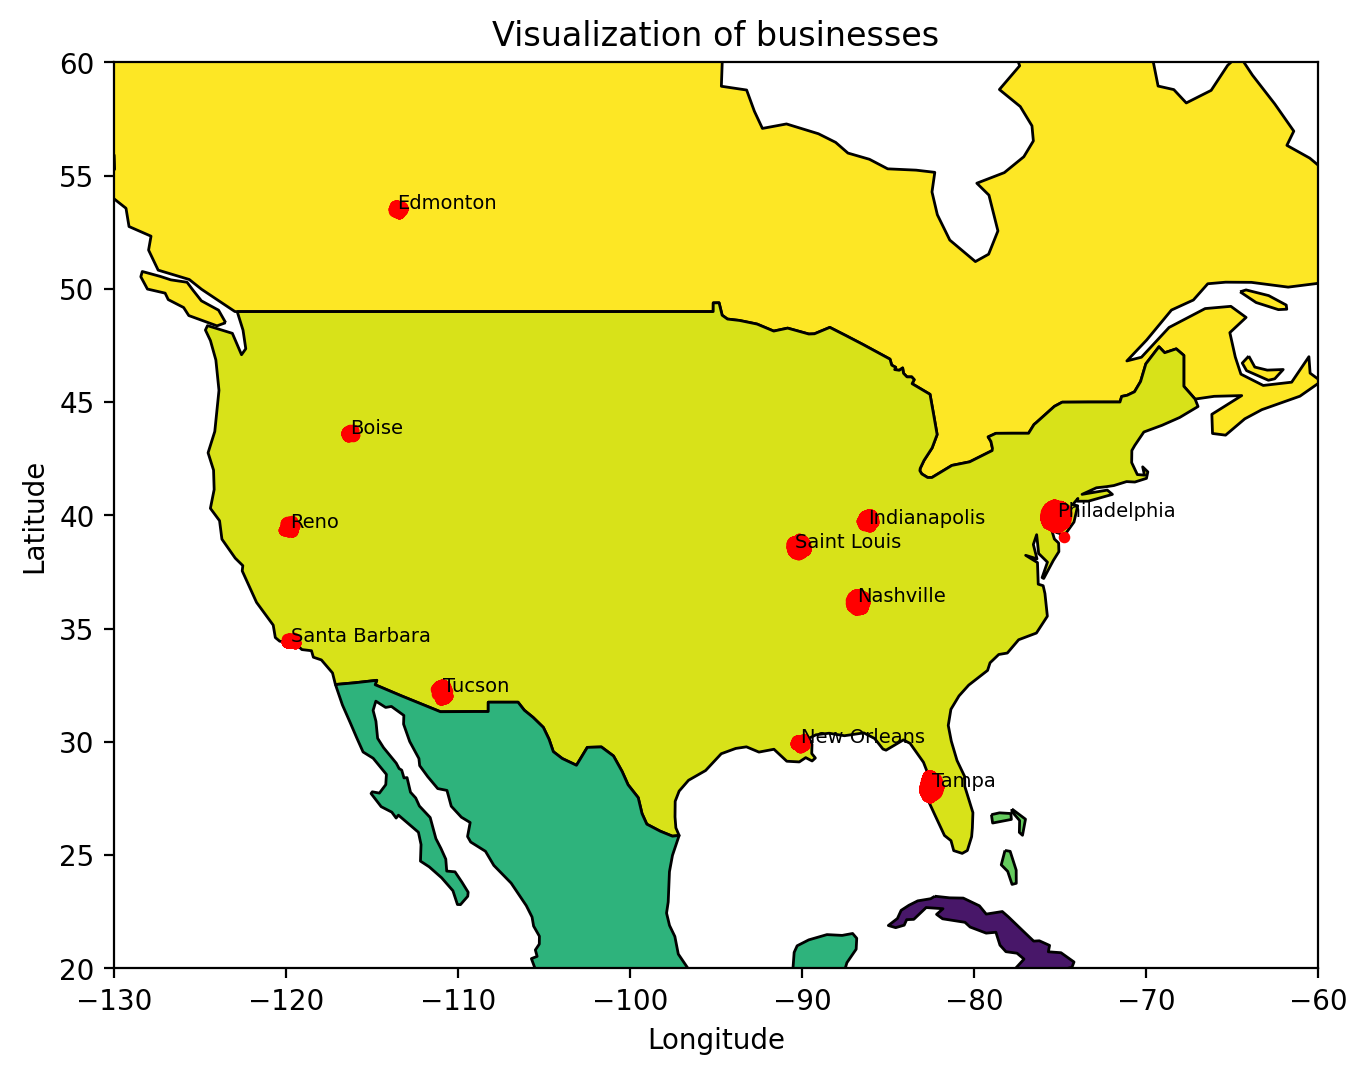

In [13]:
# Generate a layer consisting of NA map and another layer containing the location data, plotting both

ax = world[world.continent == 'North America'].plot(color='white', edgecolor='black', cmap='viridis_r')  # NA map
ax.set_xlim(-130, -60)
ax.set_ylim(20, 60)
ax.set_title('Visualization of businesses')
ax.set_ylabel('Latitude')
ax.set_xlabel('Longitude')

geo.plot(ax=ax, color='red', markersize=10)    # Plot businesses
for i, j in u_geo.iterrows():
    ax.annotate(text=j['city'], xy=j['coords'], fontsize=7, textcoords='data')

In [14]:
""" X = df_geo[['longitude', 'latitude']].to_numpy()

kmeans = KMeans()

label = kmeans.fit_predict(X)
u_labels = np.unique(label) """

" X = df_geo[['longitude', 'latitude']].to_numpy()\n\nkmeans = KMeans()\n\nlabel = kmeans.fit_predict(X)\nu_labels = np.unique(label) "

In [15]:
""" for i in u_labels:
    plt.scatter(X[label == i, 0], X[label == i, 1], label=i)
    plt.legend() """

' for i in u_labels:\n    plt.scatter(X[label == i, 0], X[label == i, 1], label=i)\n    plt.legend() '

In [16]:
""" dbscan = DBSCAN()

db_label = dbscan.fit_predict(X)
db_u_labels = u_labels = np.unique(db_label) """

' dbscan = DBSCAN()\n\ndb_label = dbscan.fit_predict(X)\ndb_u_labels = u_labels = np.unique(db_label) '

In [17]:
""" for i in db_u_labels:
    plt.scatter(X[label == i, 0], X[label == i, 1], label=i)
    plt.legend() """

' for i in db_u_labels:\n    plt.scatter(X[label == i, 0], X[label == i, 1], label=i)\n    plt.legend() '

In [18]:
""" geo_inter = fo.Map(location=(37,-95), max_zoom=14, min_zoom=4, zoom_start=4, tiles='open street map')
locations = df_geo[['latitude', 'longitude']]
cluster = MarkerCluster(locations=locations).add_to(geo_inter)
# for lat, lon, name in zip(df_geo['latitude'], df_geo['longitude'], df_geo['name']):
#     fo.Marker(location=[lat, lon], tooltip=name).add_to(geo_inter)
geo_inter """

" geo_inter = fo.Map(location=(37,-95), max_zoom=14, min_zoom=4, zoom_start=4, tiles='open street map')\nlocations = df_geo[['latitude', 'longitude']]\ncluster = MarkerCluster(locations=locations).add_to(geo_inter)\n# for lat, lon, name in zip(df_geo['latitude'], df_geo['longitude'], df_geo['name']):\n#     fo.Marker(location=[lat, lon], tooltip=name).add_to(geo_inter)\ngeo_inter "